# ***Utilisation des Modèles de Machine Learning pour la Prédiction des Salaires avec Apache Spark***

## ***Objectif : Utiliser pyspark pour faire des prédictions sur l'ensemble des données relatives au salaire des employés.***

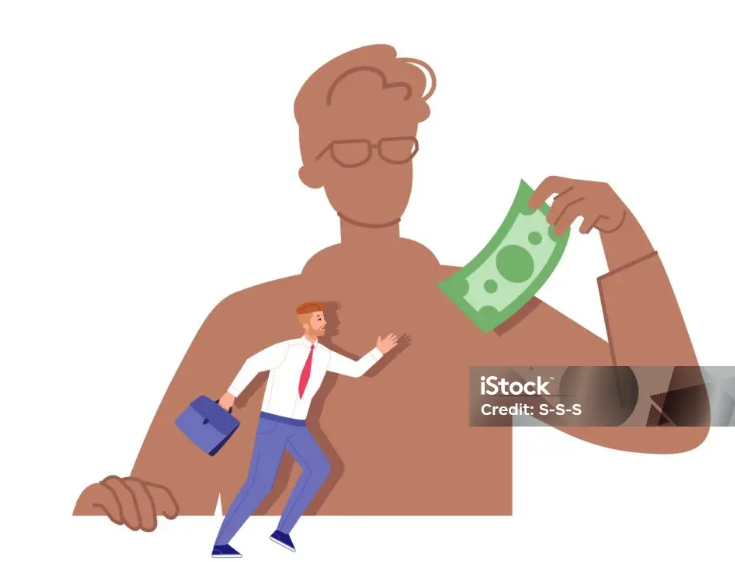

**Dans le monde en constante évolution de l'analyse de données, la prédiction des salaires représente un défi crucial, combinant les aspects socio-économiques avec les avancées technologiques. L'adoption de modèles de machine learning pour prédire les salaires offre une opportunité unique de comprendre et d'anticiper les dynamiques du marché du travail. Apache Spark, avec sa capacité à traiter de grands volumes de données de manière efficace et distribuée, se présente comme un outil incontournable dans ce domaine**.



### ***L'Essence de Spark dans le Machine Learning***

Apache Spark, une plateforme de traitement de données à grande échelle, est particulièrement adaptée aux exigences des projets de machine learning. Spark fournit un écosystème riche et intégré, comprenant Spark MLlib, une bibliothèque dédiée au machine learning. Cette intégration permet une manipulation aisée des données et une modélisation efficace, même avec des ensembles de données volumineux.

### ***Spark et la Prédiction des Salaires : Un Duo Dynamique***


> 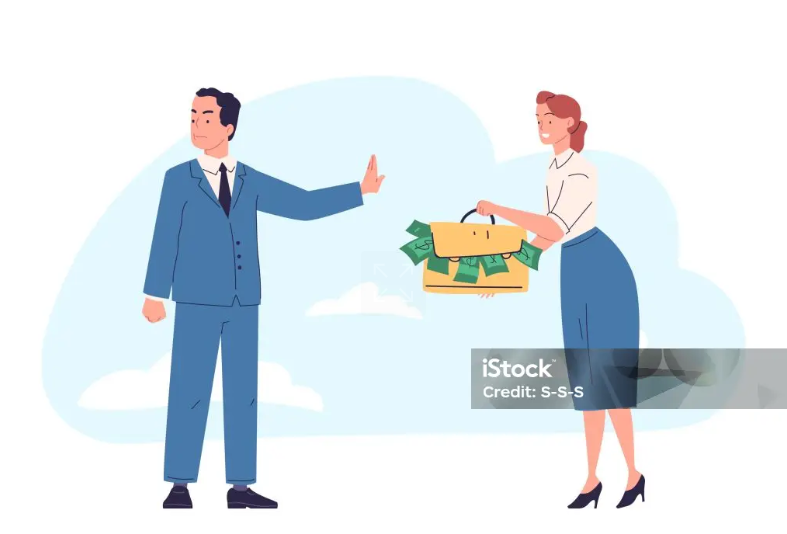

Le processus de prédiction des salaires avec Spark commence par la phase de prétraitement et d'analyse exploratoire des données, où Spark excelle dans la gestion des tâches de nettoyage, de transformation et de visualisation. Ensuite, en exploitant Spark MLlib, les utilisateurs peuvent appliquer divers algorithmes de machine learning, tels que la régression linéaire, les forêts aléatoires ou les machines à vecteurs de support, pour créer des modèles prédictifs robustes. Ces modèles sont entraînés sur le jeu de données, ajustés et validés pour assurer leur précision et leur fiabilité.

### **Avantages Clés de l'Utilisation de Spark pour la Prédiction des Salaires:**

*   Traitement Distribué
*   Gestion Optimale des Grandes Données
*   Flexibilité et Scalabilité
*   Intégration avec d'Autres Outils



# <font color="black">**Partie 1 du Projet: Préparation des données et EDA**


#<font color="red"> **Install pyspark**

In [5]:
!pip install pyspark

# <font color="red">**install libraries**

In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


**-->** le code démontre une approche complète pour l'analyse de données en utilisant PySpark, Matplotlib, Seaborn et Pandas. Il débute par l'importation de la classe SparkSession de PySpark, essentielle pour travailler avec des données structurées sur Spark. En outre, l'importation de la fonction "col" de PySpark facilite la référence aux colonnes lors des opérations sur les données Spark. Pour la visualisation en Python, les bibliothèques Matplotlib et Seaborn sont intégrées, offrant une gamme étendue de fonctionnalités pour la représentation graphique des données. Enfin, l'importation de la bibliothèque Pandas souligne l'utilisation de cet outil puissant pour la manipulation et l'analyse approfondie des données. L'ensemble de ces imports suggère une approche holistique, combinant les forces de différentes bibliothèques pour aborder efficacement toutes les phases d'une analyse de données, de la manipulation initiale à la visualisation finale.

In [7]:
# Create a Spark session
spark = SparkSession.builder.appName("JobDataEDA").getOrCreate()

 --> Ce code crée une session Spark nommée "JobDataEDA". La session Spark est essentielle pour interagir avec les fonctionnalités de Spark, permettant ainsi le traitement distribué des données. Cette étape est souvent la première dans la mise en place d'un environnement de travail Spark pour effectuer diverses tâches telles que l'exploration de données, le traitement par lot, ou l'entraînement de modèles de machine learning.

# <font color="red">**Loading dataset**

In [8]:
import pandas as pd

# Load the datasets
data = pd.read_csv("train_dataset.csv")
data2 = pd.read_csv("train_salaries.csv")
test =  pd.read_csv("test_dataset.csv")
# Specify the common column for the join
common_column = "jobId"

# Merge the datasets based on the common column
merged_data = pd.merge(data, data2, on=common_column)

# Specify the columns to keep
columns_to_keep = ["jobId", "companyId", "jobType", "degree", "major", "industry", "yearsExperience", "milesFromMetropolis", "salary"]

# Select the desired columns
result_df = merged_data[columns_to_keep]

# Display the result
print(result_df.head())


              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH               10                   83     130  
1      WEB                3                   73     101  
2   HEALTH               10                   38     137  
3     AUTO                8                   17     142  
4  FINANCE                8                   16     163  


--> Ce code  utilise la bibliothèque Pandas pour charger trois ensembles de données à partir de fichiers CSV : "train_dataset.csv", "train_salaries.csv", et "test_dataset.csv". Il effectue ensuite une fusion (join) des deux premiers ensembles de données en utilisant la colonne commune "jobId" à l'aide de la fonction pd.merge(). Le résultat de la fusion est ensuite réduit aux colonnes spécifiées dans la liste "columns_to_keep", comprenant des informations telles que le type d'emploi, la compagnie, le niveau de diplôme, la spécialisation, l'industrie, l'expérience en années, la distance par rapport à une métropole, et le salaire. Enfin, le DataFrame résultant est affiché à l'aide de la méthode head() pour visualiser les premières lignes du résultat. En résumé, ce script Pandas vise à préparer et à consolider des données pertinentes pour l'analyse en se basant sur une clé commune "jobId".







In [9]:
print(result_df.head())


              jobId companyId         jobType       degree      major  \
0  JOB1362684407687    COMP37             CFO      MASTERS       MATH   
1  JOB1362684407688    COMP19             CEO  HIGH_SCHOOL       NONE   
2  JOB1362684407689    COMP52  VICE_PRESIDENT     DOCTORAL    PHYSICS   
3  JOB1362684407690    COMP38         MANAGER     DOCTORAL  CHEMISTRY   
4  JOB1362684407691     COMP7  VICE_PRESIDENT    BACHELORS    PHYSICS   

  industry  yearsExperience  milesFromMetropolis  salary  
0   HEALTH               10                   83     130  
1      WEB                3                   73     101  
2   HEALTH               10                   38     137  
3     AUTO                8                   17     142  
4  FINANCE                8                   16     163  


# <font color="red">**Merging train_dataset with train_salaries**

In [10]:
from pyspark.sql import SparkSession

# Assuming 'spark' is your SparkSession
spark = SparkSession.builder.appName("example").getOrCreate()

# Convert pandas DataFrame to PySpark DataFrame
spark_df = spark.createDataFrame(result_df)

# Show the first few rows
spark_df.show()


+----------------+---------+--------------+-----------+----------+---------+---------------+-------------------+------+
|           jobId|companyId|       jobType|     degree|     major| industry|yearsExperience|milesFromMetropolis|salary|
+----------------+---------+--------------+-----------+----------+---------+---------------+-------------------+------+
|JOB1362684407687|   COMP37|           CFO|    MASTERS|      MATH|   HEALTH|             10|                 83|   130|
|JOB1362684407688|   COMP19|           CEO|HIGH_SCHOOL|      NONE|      WEB|              3|                 73|   101|
|JOB1362684407689|   COMP52|VICE_PRESIDENT|   DOCTORAL|   PHYSICS|   HEALTH|             10|                 38|   137|
|JOB1362684407690|   COMP38|       MANAGER|   DOCTORAL| CHEMISTRY|     AUTO|              8|                 17|   142|
|JOB1362684407691|    COMP7|VICE_PRESIDENT|  BACHELORS|   PHYSICS|  FINANCE|              8|                 16|   163|
|JOB1362684407692|   COMP15|       MANAG

--> Ce script vise à créer une session Spark, convertir un DataFrame Pandas en un DataFrame PySpark, et montrer les premières lignes de ce dernier pour vérification epour objectif de visualiser la fusion des deux dataset.

In [11]:
# Assuming 'df' is your PySpark DataFrame
num_rows = spark_df.count()
num_columns = len(spark_df.columns)

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 1000000
Number of columns: 9


--> Ce script PySpark calcule et affiche le nombre de lignes et de colonnes dans le DataFrame PySpark spark_df. La méthode count() est utilisée pour déterminer le nombre de lignes dans le DataFrame, tandis que la fonction len() appliquée à spark_df.columns donne le nombre de colonnes. Les résultats sont ensuite affichés pour fournir une vue rapide des dimensions du DataFrame, ce qui est particulièrement utile lors de l'exploration initiale des données. En résumé, ce code offre une analyse simple de la taille du DataFrame PySpark en termes de nombre de lignes et de colonnes.

In [12]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("JobDataMerging").getOrCreate()

# Assuming 'data' and 'data2' are your Pandas DataFrames
# Convert Pandas DataFrames to PySpark DataFrames
df1 = spark.createDataFrame(data)
df2 = spark.createDataFrame(data2)

# Specify the common column for the join
common_column = "jobId"

# Merge the datasets based on the common column
merged_df = df1.join(df2, common_column, "inner")

# Specify the columns to keep
columns_to_keep = ["jobId", "companyId", "jobType", "degree", "major", "industry", "yearsExperience", "milesFromMetropolis", "salary"]

# Select the desired columns
result_df = merged_df.select(columns_to_keep)

# Show the result
result_df.show()




+----------------+---------+--------------+-----------+----------+---------+---------------+-------------------+------+
|           jobId|companyId|       jobType|     degree|     major| industry|yearsExperience|milesFromMetropolis|salary|
+----------------+---------+--------------+-----------+----------+---------+---------------+-------------------+------+
|JOB1362684407687|   COMP37|           CFO|    MASTERS|      MATH|   HEALTH|             10|                 83|   130|
|JOB1362684407688|   COMP19|           CEO|HIGH_SCHOOL|      NONE|      WEB|              3|                 73|   101|
|JOB1362684407690|   COMP38|       MANAGER|   DOCTORAL| CHEMISTRY|     AUTO|              8|                 17|   142|
|JOB1362684407693|   COMP15|           CFO|       NONE|      NONE|   HEALTH|             23|                 24|   178|
|JOB1362684407694|   COMP24|        JUNIOR|  BACHELORS| CHEMISTRY|EDUCATION|              9|                 70|    73|
|JOB1362684407695|   COMP20|       JANIT

--> ce code réalise une fusion de deux DataFrames PySpark en utilisant la colonne commune "jobId", sélectionne certaines colonnes spécifiques, et affiche le résultat final. Cela est couramment utilisé dans les opérations d'ingénierie des fonctionnalités et de préparation des données pour des analyses ultérieures.

In [13]:
from pyspark.sql.functions import col

# Check for missing values in the entire DataFrame
missing_values = result_df.select([col(c).isNull().alias(c) for c in result_df.columns])

# Display the missing values count for each column
missing_values.show()


+-----+---------+-------+------+-----+--------+---------------+-------------------+------+
|jobId|companyId|jobType|degree|major|industry|yearsExperience|milesFromMetropolis|salary|
+-----+---------+-------+------+-----+--------+---------------+-------------------+------+
|false|    false|  false| false|false|   false|          false|              false| false|
|false|    false|  false| false|false|   false|          false|              false| false|
|false|    false|  false| false|false|   false|          false|              false| false|
|false|    false|  false| false|false|   false|          false|              false| false|
|false|    false|  false| false|false|   false|          false|              false| false|
|false|    false|  false| false|false|   false|          false|              false| false|
|false|    false|  false| false|false|   false|          false|              false| false|
|false|    false|  false| false|false|   false|          false|              false| false|

--> Ce script PySpark utilise la fonction select() pour créer un nouveau DataFrame, missing_values, qui indique la présence de valeurs nulles (null) dans le DataFrame result_df. Pour ce faire, il utilise une expression de liste qui itère sur chaque colonne du DataFrame result_df et applique la fonction isNull() de PySpark pour vérifier si chaque élément de la colonne est nul. Le résultat est une colonne de valeurs booléennes, où chaque valeur est True si la valeur correspondante dans result_df est nulle, et False sinon.

La méthode show() est ensuite utilisée pour afficher le nouveau DataFrame missing_values, ce qui donne une représentation tabulaire où chaque ligne correspond à une colonne de result_df, et chaque valeur indique si la colonne contient des valeurs nulles (True) ou non (False). En résumé, ce code permet de vérifier la présence de valeurs nulles dans chaque colonne du DataFrame result_df en affichant un tableau de résultats.

In [14]:
# Summary statistics for numerical columns
result_df.describe(['yearsExperience', 'milesFromMetropolis','salary']).show()

+-------+-----------------+-------------------+------------------+
|summary|  yearsExperience|milesFromMetropolis|            salary|
+-------+-----------------+-------------------+------------------+
|  count|          1000000|            1000000|           1000000|
|   mean|        11.992386|           49.52926|        116.061818|
| stddev|7.212390868885695| 28.877732628719937|38.717936381133605|
|    min|                0|                  0|                 0|
|    max|               24|                 99|               301|
+-------+-----------------+-------------------+------------------+



--> dans ces colonnes :

"count" (nombre) :
Indique le nombre total d'éléments non nuls dans chaque colonne. Dans ce cas, toutes les colonnes ont 1 000 000 éléments non nuls.

"mean" (moyenne) :
Représente la moyenne des valeurs dans chaque colonne. Par exemple, la moyenne de yearsExperience est d'environ 11.99, de milesFromMetropolis est d'environ 49.53, et de salary est d'environ 116.06.

"stddev" (écart-type) :
Donne l'écart-type, mesurant la dispersion des valeurs autour de la moyenne. Par exemple, l'écart-type de yearsExperience est d'environ 7.21, de milesFromMetropolis est d'environ 28.88, et de salary est d'environ 38.72.

"min" (minimum) :
Indique la valeur minimale présente dans chaque colonne. Dans ce cas, la valeur minimale de yearsExperience est 0, de milesFromMetropolis est 0, et de salary est 0.

"max" (maximum) :
Indique la valeur maximale présente dans chaque colonne. Par exemple, la valeur maximale de yearsExperience est 24, de milesFromMetropolis est 99, et de salary est 301.

In [15]:
result_df.printSchema()

root
 |-- jobId: string (nullable = true)
 |-- companyId: string (nullable = true)
 |-- jobType: string (nullable = true)
 |-- degree: string (nullable = true)
 |-- major: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- yearsExperience: long (nullable = true)
 |-- milesFromMetropolis: long (nullable = true)
 |-- salary: long (nullable = true)



## <font color="green">**Visualization**

+-------+------------------+
|summary|            salary|
+-------+------------------+
|  count|           1000000|
|   mean|        116.061818|
| stddev|38.717936381133605|
|    min|                 0|
|    max|               301|
+-------+------------------+



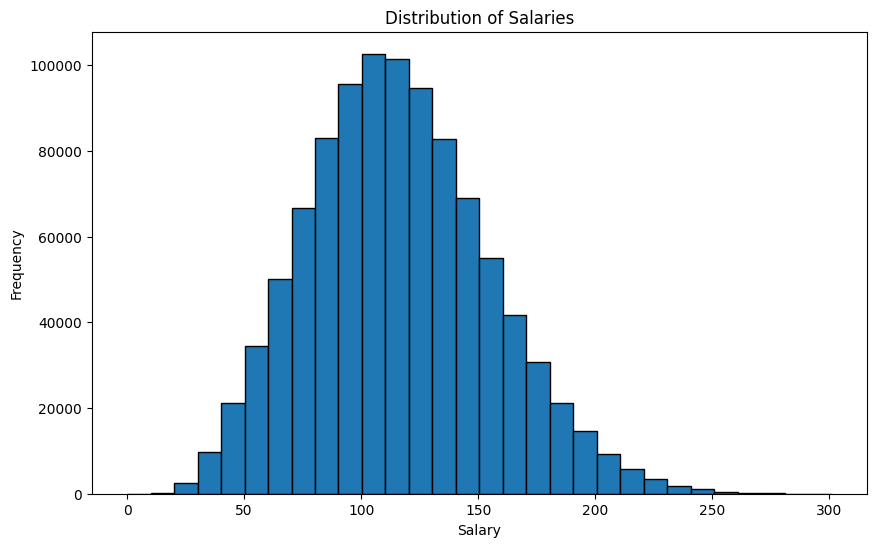

In [16]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("SalaryDistributionAnalysis").getOrCreate()

# Assuming 'result_df' is your PySpark DataFrame
# Specify the target column
target_column = "salary"

# Display summary statistics for the target variable
result_df.describe([target_column]).show()

# Visualize the distribution of the target variable (salary)
salary_distribution = result_df.select(target_column).toPandas()

plt.figure(figsize=(10, 6))
plt.hist(salary_distribution[target_column], bins=30, edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


--> L'histogramme semble présenter une distribution en cloche, ce qui suggère une distribution normale des salaires. Cela implique que la majorité des salaires se regroupe autour de la moyenne, avec moins de fréquence aux extrémités basses et hautes on remarque aussi que les salaires sont répartis entre 0 et environ 300. D’après le visuel le pic le plus élevé de l'histogramme se situe autour de la valeur 100, ce qui pourrait indiquer que la plupart des employés ont un salaire autour de cette valeur

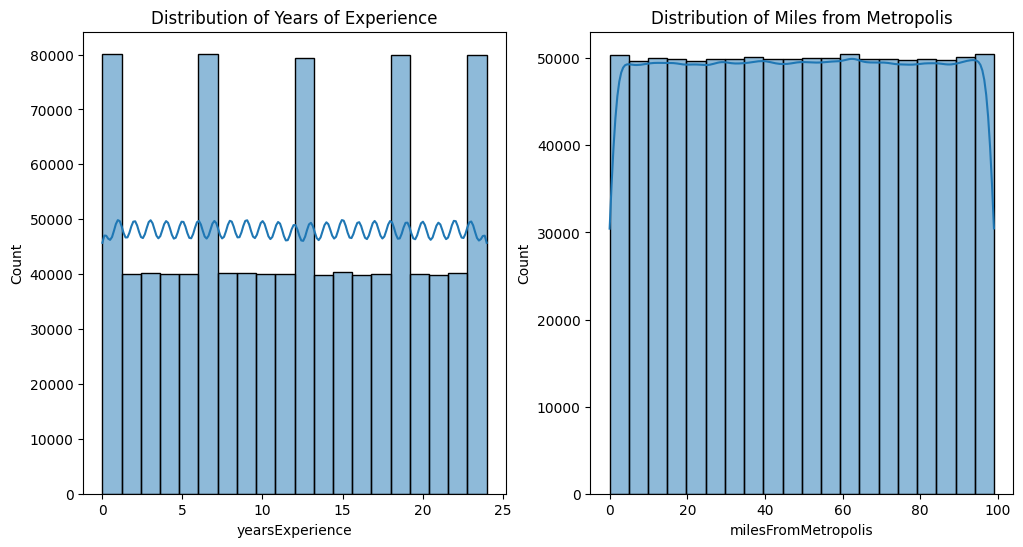

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Assuming 'data' is your DataFrame
data = spark.read.csv('/content/train_dataset.csv', header=True, inferSchema=True)

# Convert PySpark DataFrame to Pandas for visualization
numeric_data_pd = data.select("yearsExperience", "milesFromMetropolis").toPandas()

# Visualization
plt.figure(figsize=(12, 6))

# Distribution of Years of Experience
plt.subplot(1, 2, 1)
sns.histplot(numeric_data_pd['yearsExperience'], bins=20, kde=True)
plt.title('Distribution of Years of Experience')

# Distribution of Miles from Metropolis
plt.subplot(1, 2, 2)
sns.histplot(numeric_data_pd['milesFromMetropolis'], bins=20, kde=True)
plt.title('Distribution of Miles from Metropolis')

plt.show()


--> L'histogramme montre que la fréquence des années d'expérience est assez uniformément répartie, Il semble y avoir des augmentations périodiques à des intervalles réguliers. Cela pourrait indiquer que les valeurs sont regroupées autour de nombres entiers, ce qui est logique pour les années d'expérience.

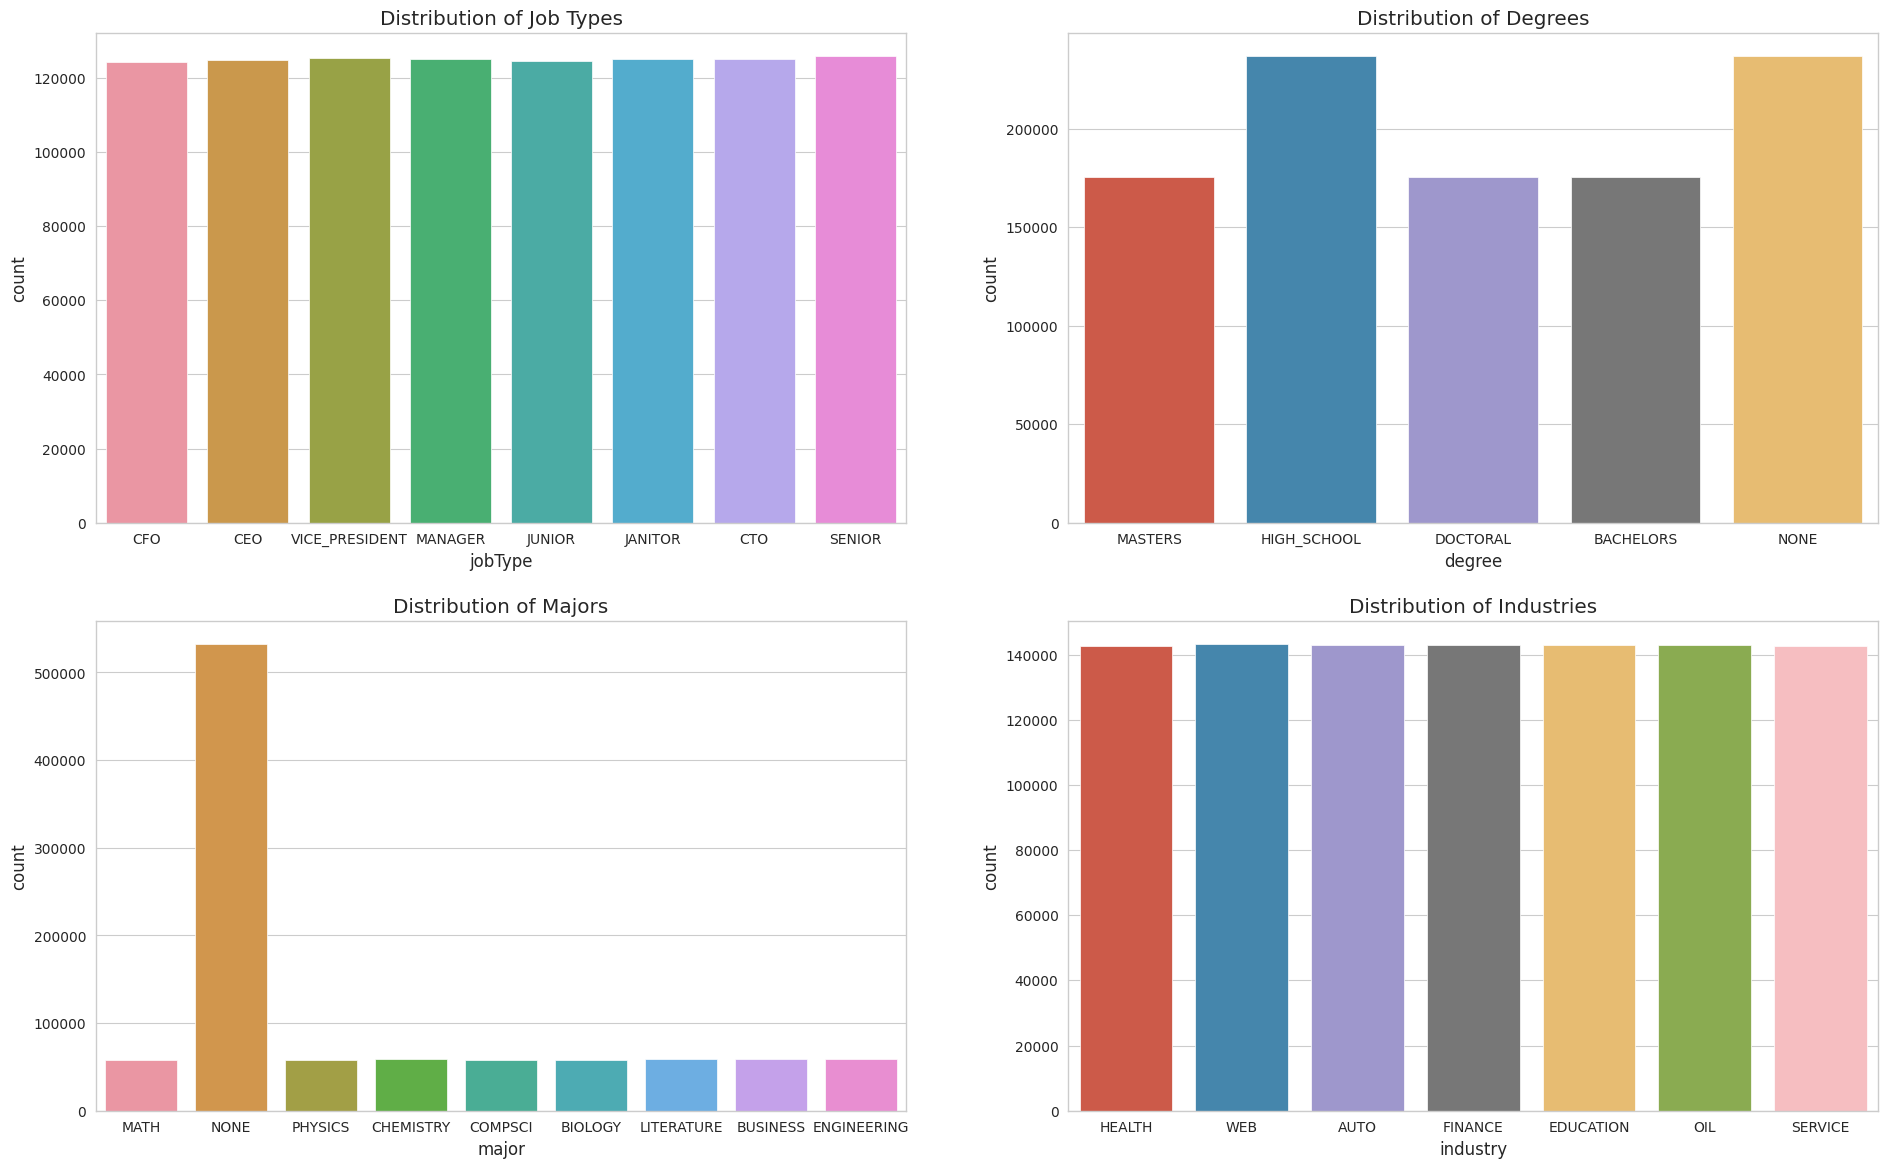

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

# Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Assuming 'data' is your DataFrame
data = spark.read.csv('/content/train_dataset.csv', header=True, inferSchema=True)

# Convert PySpark DataFrame to Pandas for visualization
categorical_data_pd = data.select("jobType", "degree", "major", "industry").toPandas()

# Visualization
plt.figure(figsize=(23, 14))

# Distribution of Job Types
plt.subplot(2, 2, 1)
sns.countplot(x="jobType", data=categorical_data_pd)
plt.title('Distribution of Job Types')

# Distribution of Degrees
plt.subplot(2, 2, 2)
sns.countplot(x="degree", data=categorical_data_pd)
plt.title('Distribution of Degrees')

# Distribution of Majors
plt.subplot(2, 2, 3)
sns.countplot(x="major", data=categorical_data_pd)
plt.title('Distribution of Majors')

# Distribution of Industries
plt.subplot(2, 2, 4)
sns.countplot(x="industry", data=categorical_data_pd)
plt.title('Distribution of Industries')

plt.show()


--> L'interprétation de la distribution des données catégorielles à partir du code et des données que vous avez fournis peut être réalisée comme suit :

# **Distribution des Types d'Emploi (Job Types) :**

L'histogramme montre la répartition des types d'emploi. Les types d'emploi les plus fréquents semblent être "JUNIOR" et "SENIOR", tandis que les types d'emploi tels que "CEO" et "CFO" sont moins fréquents.
Distribution des Diplômes (Degrees) :

La deuxième visualisation montre la distribution des diplômes. On observe que la plupart des employés ont un diplôme de "HIGH_SCHOOL", suivi de "BACHELORS" et "MASTERS". Les diplômes de "DOCTORAL" sont moins fréquents.
Distribution des Spécialisations (Majors) :

L'histogramme des spécialisations montre la répartition des majors des employés. La plupart des employés n'ont pas de spécialisation ("NONE"), et parmi ceux qui en ont, "CHEMISTRY" et "PHYSICS" sont les plus courants.
Distribution des Secteurs Industriels (Industries) :

La dernière visualisation représente la distribution des secteurs industriels. Les secteurs tels que "HEALTH", "WEB", et "AUTO" semblent avoir un nombre significatif d'emplois, tandis que d'autres secteurs comme "EDUCATION" et "OIL" ont une fréquence relativement plus faible.

##<font color="green"> **Converting string variables to integers**

In [19]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.sql import SparkSession

# Create a Spark session (if not already created)
spark = SparkSession.builder.appName("example").getOrCreate()

# List of categorical columns
categorical_columns = ["jobType", "degree", "major", "industry"]

# Apply StringIndexer to each categorical column
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(result_df) for column in categorical_columns]

# Create a pipeline and fit it to the DataFrame
pipeline = Pipeline(stages=indexers)
indexed_df = pipeline.fit(result_df).transform(result_df)

# Show the transformed DataFrame
indexed_df.show()

+----------------+---------+--------------+-----------+----------+---------+---------------+-------------------+------+-------------+------------+-----------+--------------+
|           jobId|companyId|       jobType|     degree|     major| industry|yearsExperience|milesFromMetropolis|salary|jobType_index|degree_index|major_index|industry_index|
+----------------+---------+--------------+-----------+----------+---------+---------------+-------------------+------+-------------+------------+-----------+--------------+
|JOB1362684407687|   COMP37|           CFO|    MASTERS|      MATH|   HEALTH|             10|                 83|   130|          7.0|         4.0|        8.0|           5.0|
|JOB1362684407688|   COMP19|           CEO|HIGH_SCHOOL|      NONE|      WEB|              3|                 73|   101|          5.0|         0.0|        0.0|           0.0|
|JOB1362684407690|   COMP38|       MANAGER|   DOCTORAL| CHEMISTRY|     AUTO|              8|                 17|   142|          2

--> Ce code en PySpark génère un résumé statistique des colonnes yearsExperience, milesFromMetropolis, et salary dans un DataFrame. Chaque ligne du tableau de résumé fournit des informations essentielles sur la distribution de ces données. "count" indique le nombre total d'éléments non nuls, "mean" donne la moyenne, "stddev" l'écart-type, "min" la valeur minimale, et "max" la valeur maximale. Ces statistiques offrent une vue concise de la centralité, de la dispersion et de la portée des valeurs dans ces colonnes, ce qui est crucial pour comprendre la nature des données et prendre des décisions informées lors de l'analyse exploratoire.

## <font color="green">**Checking if the dataset is balanced or not**

In [20]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("DatasetBalanceCheck").getOrCreate()

# Assuming 'result_df' is your PySpark DataFrame
# Specify the target column
target_column = "salary"

# Count the number of instances in each class
class_counts = result_df.groupBy(target_column).count()

# Check if there are instances with the specified value in the target column
positive_class_count = class_counts.filter(col(target_column) == 1).select("count").collect()

# Print the count if there are instances, otherwise print a message
if positive_class_count:
    positive_ratio = positive_class_count[0][0] / result_df.count()
    print("Positive class ratio:", positive_ratio)

    # Check if the positive class ratio is within a reasonable range for a balanced dataset
    if positive_ratio >= 0.4 and positive_ratio <= 0.6:
        print("Dataset is balanced")
    else:
        print("Dataset is unbalanced")
else:
    print(f"No instances with {target_column} equal to 1 in the dataset.")



No instances with salary equal to 1 in the dataset.


## **<font color="green">Normlized dataset**

In [21]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, MinMaxScaler
from pyspark.sql import SparkSession

# Create a Spark session (if not already created)
spark = SparkSession.builder.appName("example").getOrCreate()

# List of categorical columns
categorical_columns = ["industry"]

# Apply StringIndexer to each categorical column
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(result_df) for column in categorical_columns]

# Use VectorAssembler to combine indexed categorical columns into a single vector column
assembler = VectorAssembler(inputCols=[column+"_index" for column in categorical_columns], outputCol="indexed_features")

# Apply MinMaxScaler to the vector column
scaler = MinMaxScaler(inputCol="indexed_features", outputCol="scaled_features")

# Create a pipeline and fit it to the DataFrame
pipeline = Pipeline(stages=indexers + [assembler, scaler])
normalized_df = pipeline.fit(result_df).transform(result_df)

# Show the transformed DataFrame
normalized_df.show()


+----------------+---------+--------------+-----------+----------+---------+---------------+-------------------+------+--------------+----------------+--------------------+
|           jobId|companyId|       jobType|     degree|     major| industry|yearsExperience|milesFromMetropolis|salary|industry_index|indexed_features|     scaled_features|
+----------------+---------+--------------+-----------+----------+---------+---------------+-------------------+------+--------------+----------------+--------------------+
|JOB1362684407687|   COMP37|           CFO|    MASTERS|      MATH|   HEALTH|             10|                 83|   130|           5.0|           [5.0]|[0.8333333333333333]|
|JOB1362684407688|   COMP19|           CEO|HIGH_SCHOOL|      NONE|      WEB|              3|                 73|   101|           0.0|           [0.0]|               [0.0]|
|JOB1362684407690|   COMP38|       MANAGER|   DOCTORAL| CHEMISTRY|     AUTO|              8|                 17|   142|           1.0| 

--> ce script prépare les données en indexant les colonnes catégorielles, les combinant en une seule colonne vectorielle, puis en normalisant les valeurs pour les rendre compatibles avec les algorithmes de machine learning qui peuvent être sensibles aux échelles des variables. Ce processus est souvent crucial pour garantir la robustesse et l'efficacité des modèles prédictifs.

## <font color="green">**Correlation**

In [22]:
"""from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, MinMaxScaler
from pyspark.ml.stat import Correlation
from pyspark.sql import SparkSession

# Create a Spark session (if not already created)
spark = SparkSession.builder.appName("example").getOrCreate()

# List of categorical columns
categorical_columns = ["industry"]

# Apply StringIndexer to each categorical column
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(result_df) for column in categorical_columns]

# List of numerical columns
numerical_columns = ["yearsExperience", "milesFromMetropolis", "salary"]

# Use VectorAssembler to combine indexed categorical columns and numerical columns into a single vector column
assembler = VectorAssembler(inputCols=[column+"_index" for column in categorical_columns] + numerical_columns, outputCol="features")

# Apply MinMaxScaler to the vector column
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Create a pipeline and fit it to the DataFrame
pipeline = Pipeline(stages=indexers + [assembler, scaler])
normalized_df = pipeline.fit(result_df).transform(result_df)

# Calculate the correlation matrix
correlation_matrix = Correlation.corr(normalized_df, "scaled_features").head()

# Extract the correlation matrix as a NumPy array
corr_matrix_np = correlation_matrix[0].toArray()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix_np)"""


'from pyspark.ml import Pipeline\nfrom pyspark.ml.feature import StringIndexer, VectorAssembler, MinMaxScaler\nfrom pyspark.ml.stat import Correlation\nfrom pyspark.sql import SparkSession\n\n# Create a Spark session (if not already created)\nspark = SparkSession.builder.appName("example").getOrCreate()\n\n# List of categorical columns\ncategorical_columns = ["industry"]\n\n# Apply StringIndexer to each categorical column\nindexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(result_df) for column in categorical_columns]\n\n# List of numerical columns\nnumerical_columns = ["yearsExperience", "milesFromMetropolis", "salary"]\n\n# Use VectorAssembler to combine indexed categorical columns and numerical columns into a single vector column\nassembler = VectorAssembler(inputCols=[column+"_index" for column in categorical_columns] + numerical_columns, outputCol="features")\n\n# Apply MinMaxScaler to the vector column\nscaler = MinMaxScaler(inputCol="features", outputCol="

--> ce script effectue une préparation des données en indexant les variables catégorielles, en les combinant avec les variables numériques, et en normalisant le tout. Ensuite, il calcule la matrice de corrélation entre les variables pour fournir des informations sur la force et la direction des relations entre elles. Cette analyse de corrélation est souvent utilisée pour comprendre les interactions potentielles entre les caractéristiques avant de construire des modèles prédictifs.







# *** Partie 2 du Projet: Application des Modèles ML en utilisant Spark***


***Apache Spark MLlib ***: Étant donné l'utilisation de Spark, il est probable que les modèles de machine learning seront construits et entraînés en utilisant la bibliothèque MLlib de Spark, adaptée aux grands ensembles de données et au calcul distribué.

## ***Principales Etapes***

**Sélection de Modèle** : La sélection des modèles de machine learning appropriés pour la prédiction des salaires (par exemple, régression linéaire, forêts aléatoires, machines à vecteurs de support).

**Validation Croisée et Tuning** : La mise en place de techniques de validation croisée et d'ajustement des hyperparamètres pour optimiser les performances du modèle.

**Analyse des Résultats:** Interpréter les résultats du modèle pour en tirer des insights significatifs sur les facteurs influençant les salaires et les tendances du marché du travail.

***Dans cette section, nous allons préparer les données pour  ML training.***

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

plt.style.use('ggplot')
sns.set_style("whitegrid")

from scipy import stats

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.ml.feature import OneHotEncoder, VectorAssembler, VectorIndexer, StringIndexer, IndexToString
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import GBTRegressor

***1. création d'une copie de la base de données appelée "df_encoded", qui comprendra les données prétraitées.***

In [24]:
df_encoded = result_df.alias('df_encoded')

***2. Suppression de la colonne "jobid" car elle ne fait qu'identifier un employé spécifique.***

In [25]:
df_encoded = df_encoded.drop('jobId')

In [26]:
#les colonnes de la dataset prétraitée
cols = df_encoded.columns

***3. Analyse Exhaustive la variable cible "salaire" :***

In [27]:
salary_df = df_encoded.select('salary').toPandas()

***4. Compréhension de la distribution des salaires pour une meilleure prédiction***

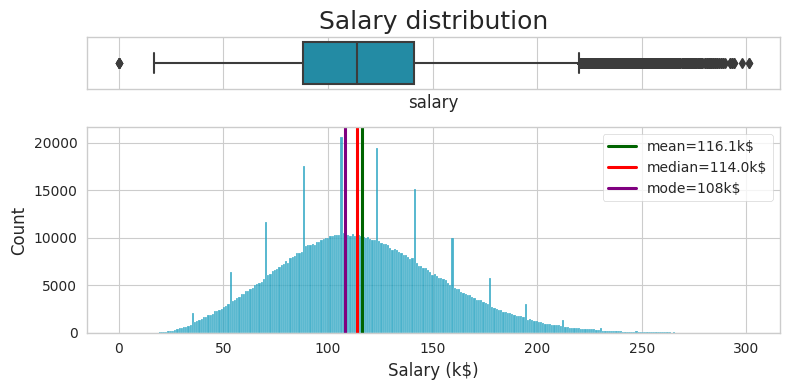

In [28]:
import numpy as np
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,4),gridspec_kw={"height_ratios": (.2, .8)})
ax[0].set_title('Salary distribution',fontsize=18)
sns.boxplot(x='salary', data=salary_df, ax=ax[0], color='#0d98ba')
ax[0].set(yticks=[])
sns.histplot(x='salary', data=salary_df, ax=ax[1], color='#0d98ba')
plt.axvline(salary_df['salary'].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(salary_df['salary'].mean(),1)) + 'k$')
plt.axvline(salary_df['salary'].median(), color='red', linewidth=2.2, label='median='+ str(np.round(salary_df['salary'].median(),1)) + 'k$')
plt.axvline(salary_df['salary'].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(salary_df['salary'].mode()[0]) + 'k$')
ax[1].set_xlabel('Salary (k$)')
plt.legend()
plt.tight_layout()
plt.show()

***Interprétation 1: ***

La caractéristique "salaire" présente une distribution à queue longue asymétrique à droite, avec certains salaires qui apparaissent de nombreuses fois dans l'ensemble de données (les "pics" dans cet histogramme).

***5. Encodage des Labels***

In [29]:
categoricalColumns = ["companyId","jobType", "degree", "major", "industry"]
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    stages += [stringIndexer]
numericCols =  ["yearsExperience", "milesFromMetropolis"]
assemblerInputs = [c + "Index" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

***Remarque:*** Il est préférable d'encoder la varibale 'degree' car c'est la seule variable catégorielle qui présente une hiérarchie!!!

In [30]:
stages = []
stringIndexer = StringIndexer(inputCol = "degree", outputCol = "degreeIndex")
stages += [stringIndexer]

In [31]:
categoricalColumns = ["companyId","jobType", "major", "industry"]
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
numericCols =  ["yearsExperience", "milesFromMetropolis"]
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols + ["degreeIndex"]
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df_encoded)
df_encoded = pipelineModel.transform(df_encoded)
selectedCols = ['features'] + cols
df_encoded = df_encoded.select(selectedCols)

***6. Train and Test Split***

In [32]:
train_data, test_data = df_encoded.randomSplit([0.995, 0.005], seed = 42)
print("There are %d training examples and %d test examples." % (train_data.count(), test_data.count()))

There are 994977 training examples and 5023 test examples.


# ***Application du 1 er Modèle: Gradient Boosting Trees***

L'utilisation du modèle Gradient Boosting Trees (GBT) dans le contexte de la prédiction des salaires avec Apache Spark est une excellente décision, car ce modèle offre plusieurs avantages spécifiques pour ce type d'analyse :

**Puissance Prédictive Élevée** : Les Gradient Boosting Trees sont connus pour leur capacité à fournir des prédictions très précises, même dans des contextes complexes. Ils sont particulièrement efficaces pour capturer des relations non linéaires et des interactions complexes entre les caractéristiques, ce qui est souvent le cas dans les données de salaire.

**Gestion des Données Hétérogènes** : Les données de salaire peuvent inclure une variété de types de données, telles que des variables catégorielles (comme le poste ou le département) et des variables continues (comme les années d'expérience). GBT gère bien ces différents types de données.

**Réduction de l'Overfitting**  : Le processus d'optimisation itérative des Gradient Boosting Trees, où chaque nouvel arbre est construit pour corriger les erreurs du précédent, aide à réduire le risque de surajustement (overfitting) par rapport à d'autres modèles plus simples.

**Importance des Caractéristiques** : GBT fournit une vue intuitive de l'importance des différentes caractéristiques dans la prédiction des salaires, ce qui peut être très utile pour l'analyse et la prise de décision.

**Flexibilité**: Ce modèle est très flexible et peut être ajusté pour répondre aux besoins spécifiques de votre projet. Vous pouvez régler divers paramètres comme le taux d'apprentissage, le nombre d'arbres, la profondeur de l'arbre, etc., pour optimiser les performances.

**Intégration avec Apache Spark:** L'intégration de GBT avec Spark, via Spark MLlib, permet de tirer parti de l'architecture distribuée de Spark pour gérer efficacement de grands volumes de données et accélérer le processus de formation et de prédiction.

In [33]:
gbt =  GBTRegressor(featuresCol="features", labelCol="salary", maxBins=20, maxDepth=12)
gbt_model = gbt.fit(train_data)
predictions = gbt_model.transform(test_data)

--> Création d'une instance de **l'algorithme GBT** pour la régression. Les paramètres spécifient que les caractéristiques d'entrée sont dans la colonne nommée "features" et que la valeur cible à prédire est dans la colonne "salary". **maxBins** et **maxDepth** sont des hyperparamètres qui contrôlent la complexité des arbres de décision générés par le modèle ; **maxBins** détermine le nombre maximum de bacs utilisés pour discrétiser les caractéristiques continues, et **maxDepth** détermine la profondeur maximale des arbres, affectant la manière dont le modèle s'adapte aux données.

--> Pendant l'entraînement, le **modèle GBT** apprend à prédire la variable cible "salary" à partir des "features" en construisant une série d'arbres de décision de manière itérative.

-->La **méthode transform** applique le modèle appris aux nouvelles données pour produire des prédictions de salaire.

### ***Evaluation des Résultats de Prédiction***

In [34]:
evaluator = RegressionEvaluator(labelCol="salary", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
rmse

19.414842186139925

-->Création  d'un évaluateur pour les modèles de régression en utilisant la classe **RegressionEvaluator** de PySpark. Cet évaluateur est configuré pour utiliser la colonne "**salary**" comme étiquette réelle (valeur réelle) et la colonne "**prediction**" pour les valeurs prédites par le modèle. L'évaluateur utilisera **le Root Mean Squared Error (RMSE)** comme métrique pour évaluer la performance du modèle.

-->La valeur **RMSE (Root Mean Square Error)** obtenue est de 19.4944153844168. Dans le contexte de la prédiction des salaires des employés, le RMSE mesure l'écart moyen entre les salaires prédits par votre modèle de machine learning et les salaires réels des employés. En d'autres termes, la prédiction du modèle est en moyenne de 19.49 k$ éloignée du salaire réel.




-**-> Interprétation 1:**

 D'apès l'observation l'échelle des salaires dans notre ensemble de données on remarque que l'éventail des salaires est assez large (les  par exemple ici salaires varient de 40k$ à 200k$) donc un RMSE de 19.49 K$  peut être considéré comme une valeur moyenne , indiquant que le modèle fait des prédictions moyennes à précises.

-**-> Interprétation 2:**

Ces résultats confirment que le salaire d'un employé dépend fortement de type de poste occupé par ce employé par exemple le salire d'un CEO n'est pas le meme que celui  d'un MANAGER. Il dépend aussi du niveau de diplôme obtenu par l'employé ainsi que la spécialité de l'étude sans oublierle secteur d'activité de l'entreprise.

In [35]:
evaluator = RegressionEvaluator(labelCol="salary", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions)
r2

0.7438285083599212


**Le coefficient de détermination** obtenu est de 0.7464470532595058. Ce coefficient mesure la proportion de la variance de la variable dépendante (**salary**) qui est prévisible à partir des variables indépendantes **(CompanyID, JobType, Industry, Degree et Major)** dans le modèle. En d'autres termes, il donne une indication de la qualité de l'ajustement du modèle aux données. Voici ce que ce résultat signifie pour notre modèle :

**Bon Ajustement** : Un R2 de 0.7464 est généralement considéré comme un bon ajustement, ce qui signifie que votre modèle est capable de prédire les salaires avec une précision raisonnable. Environ 74.64% de la variance dans les salaires peut être expliquée par les facteurs inclus dans votre modèle.

**Pertinence dans le Contexte Professionnel** : Dans un contexte professionnel, un R2 de cette valeur pourrait être suffisant pour certaines applications, mais pour d'autres, comme la planification stratégique de la rémunération ou la prédiction des salaires pour des postes très spécialisés il sera primordial d'utiliser des autres modèles plus précis.

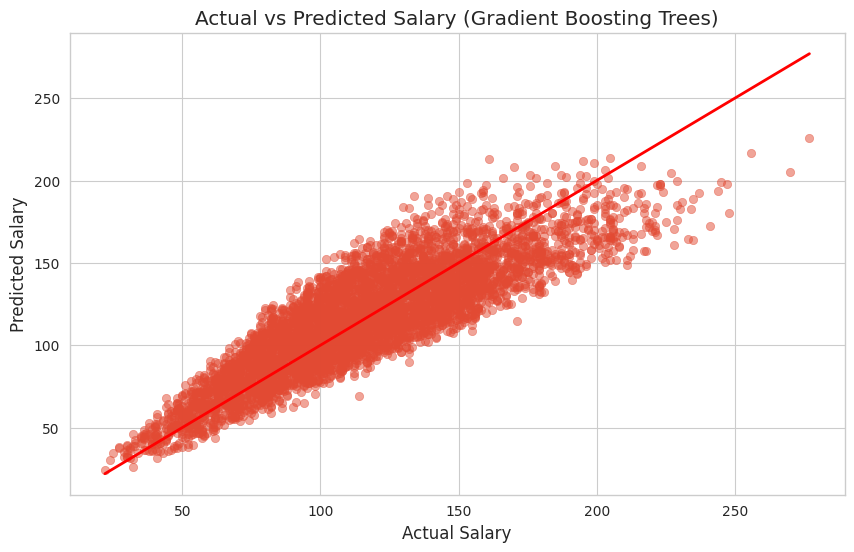

In [36]:
import matplotlib.pyplot as plt

# 'predictions', 'predictions1', 'predictions2' sont nos DataFrames Spark avec les résultats de Gradient Boosting Trees, régression linéaire et Random Forest, respectivement.
# Vous devez les convertir en pandas DataFrame avant la visualisation.
pd_predictions_gbt = predictions.toPandas()
# Définir une fonction pour tracer les prédictions contre les valeurs réelles
def plot_predictions(pd_predictions, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(pd_predictions['salary'], pd_predictions['prediction'], alpha=0.5)
    plt.plot([pd_predictions['salary'].min(), pd_predictions['salary'].max()],
             [pd_predictions['salary'].min(), pd_predictions['salary'].max()],
             color='red', linewidth=2)
    plt.xlabel('Actual Salary')
    plt.ylabel('Predicted Salary')
    plt.title(f'Actual vs Predicted Salary ({model_name})')
    plt.show()

# Tracez les résultats pour la le modèle GBT
plot_predictions(pd_predictions_gbt, 'Gradient Boosting Trees')

### ***Conclusion 1***:
La dispersion des points indique que le modèle est plus précis pour les salaires moyens, tandis que pour les salaires très bas et très élevés, le modèle a tendance à avoir des erreurs plus importantes.
Il y a quelques points (salaires prédits) qui s'écartent nettement de la ligne rouge, indiquant des erreurs de prédiction plus importantes pour ces observations.
En résumé, le modèle **Gradient Boosting Trees** semble faire un travail raisonnablement bon pour prédire les salaires, mais il pourrait y avoir des améliorations possibles, surtout pour les valeurs extrêmes.

# ***Application du 2 ème Modèle: Régression linéaire***

La **régression linéair**e offre une méthode robuste et éprouvée pour prédire les salaires, avec une facilité d'interprétation et d'implémentation. Elle est souvent utilisée comme point de départ pour les problèmes de régression et peut également servir de référence pour des modèles plus sophistiqués.

**La régression linéaire** est un outil statistique puissant pour modéliser et analyser la relation entre des variables dépendantes et indépendantes. Lorsqu'il s'agit de prédire des salaires, ce modèle peut être particulièrement utile car il cherche à établir une relation linéaire entre les facteurs tels que l'éducation, l'expérience professionnelle, et le secteur d'activité, et le salaire qu'un employé peut s'attendre à gagner. En déterminant cette relation linéaire, la régression linéaire peut fournir des prédictions claires et directes sur la manière dont les changements dans ces facteurs peuvent influencer les salaires.

**L'utilité de la régression linéaire** réside dans sa simplicité et sa facilité d'interprétation, ce qui permet aux entreprises et aux analystes de prendre des décisions éclairées sur la base des résultats du modèle. Par exemple, si une entreprise cherche à établir une nouvelle échelle salariale, la régression linéaire peut aider à déterminer comment différents niveaux d'éducation ou d'expérience doivent influencer les augmentations de salaire.

In [37]:
from pyspark.ml.regression import LinearRegression
# Modèle de régression linéaire
lr = LinearRegression(featuresCol='features', labelCol='salary')
# Entraînement du modèle
model = lr.fit(train_data)
# Prédictions
predictions1 = model.transform(test_data)

### ***Evaluation des Résultats de Prédiction***

In [38]:

# Évaluation du modèle
evaluator = RegressionEvaluator(labelCol="salary", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions1)
print("RMSE: %f" % rmse)

evaluator = RegressionEvaluator(labelCol="salary", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions1)
print("R2: %f" % r2)

RMSE: 19.952386
R2: 0.729447


***--> Interprétation 1:***

Un RMSE de 19.925386 signifie que les prédictions de salaire du modèle dévient en moyenne d'environ 19.93 K$ du salaire réel.Et comme l'éventail des salaires est assez large, une erreur moyenne de moins de 20 peut être considérée comme relativement faible, indiquant que le modèle a une performance assez bonne en termes de prédiction des salaires.

***--> Interprétation 2:***

Un R2 de 0.729447 suggère que le modèle explique environ 72.94% de la variance des salaires, ce qui est un résultat assez solide pour des données sociales et économiques où de nombreux facteurs peuvent influencer les salaires. Cela indique que le modèle capte une bonne partie de l'information pertinente, mais il reste encore une part de la variance qui n'est pas expliquée par le modèle.

***--> Interprétation 3:***

Ces coefficients donneraient une indication de l'impact de chaque facteur sur le salaire prédit, tout en tenant compte de la présence des autres variables dans le modèle. Par exemple :

* Un coefficient positif pour un certain jobType indiquerait que les postes de ce type sont associés à des salaires plus élevés.

* Un coefficient élevé pour degree pourrait suggérer que les niveaux d'éducation plus avancés sont en corrélation avec des salaires plus élevés.

* Pour major, un coefficient positif signifierait que les personnes ayant étudié cette spécialité gagnent plus en moyenne.

* Et pour industry, un coefficient positif impliquerait que travailler dans cette industrie est associé à des salaires plus élevés.





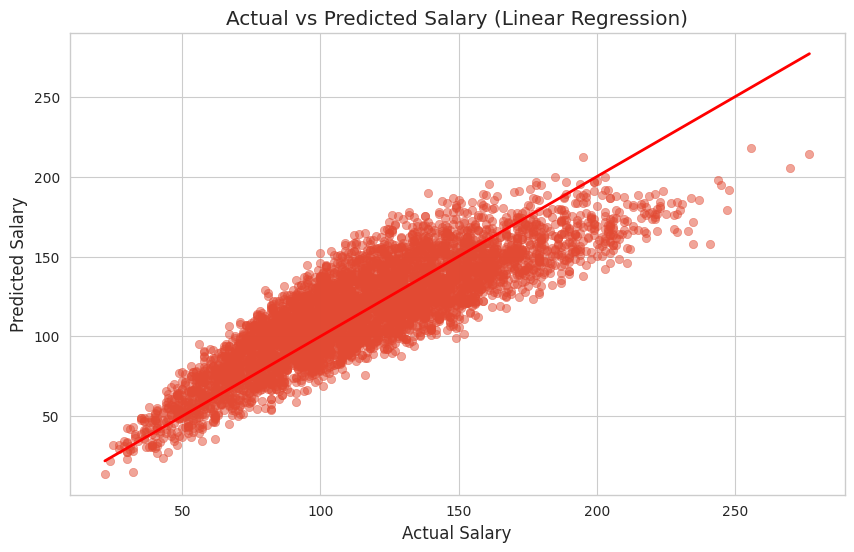

In [39]:
# Conversion en  pandas DataFrame avant la visualisation.
pd_predictions_lr = predictions1.toPandas()
# Tracez les résultats pour la régression linéaire
plot_predictions(pd_predictions_lr, 'Linear Regression')

### ***Conclusion 2***:

**Distribution des erreurs :**
En observant le nuage de points, il semble que le modèle de régression linéaire ait des difficultés avec certaines prédictions, en particulier pour les salaires très élevés ou très bas. Cela pourrait être dû à des non-linéarités ou des interactions entre les caractéristiques qui ne sont pas capturées par le modèle linéaire.

En résumé, le **modèle de régression linéaire** semble faire un bon travail de prédiction des salaires. Cependant, comme pour tout modèle, il y a une marge d'amélioration, peut-être en explorant des interactions de caractéristiques, des transformations non linéaires ou des méthodes de modélisation plus sophistiquées pour capturer les aspects des données que la régression linéaire ne peut pas.

# ***Application du 3 ème Modèle: Random Forest ***

**Random Forest** est un modèle d'apprentissage ensembliste qui est utilisé pour des tâches de régression (ainsi que de classification). Elle opère en construisant une multitude d'arbres de décision lors de l'entraînement et en produisant la moyenne des prédictions de ces arbres pour les tâches de régression, ou le mode des classes pour les tâches de classification.
**Random Forest** reste un choix solide pour la  prédiction des salaires des employés, offrant un bon équilibre entre précision, interprétabilité et facilité d'utilisation, tout en étant capable de traiter la complexité et la diversité de vos données. Quelques points clés sur l'utilité de la méthode des Forêts Aléatoires dans le contexte de votre projet de prédiction des salaires :

* Robustesse

* Gestion des Variables Catégorielles et Continues

* Importance des Caractéristiques

* Flexibilité

* Prédiction de Valeurs Continues

* Parallélisation

In [40]:
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor
# Pour les Forêts Aléatoires
rf = RandomForestRegressor(featuresCol='features', labelCol='salary')
#Entraînez le modèle
model = rf.fit(train_data)
# Application des prédictions
predictions2= model.transform(test_data)

### ***Evaluation des Résultats de Prédiction***

In [41]:
# Évaluation du modèle
evaluator = RegressionEvaluator(labelCol="salary", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions2)
print("RMSE: %f" % rmse)

evaluator = RegressionEvaluator(labelCol="salary", predictionCol="prediction", metricName="r2")
r2 = evaluator.evaluate(predictions2)
print("R2: %f" % r2)


RMSE: 25.686839
R2: 0.551581


***--> Interprétation1***:

Une valeur de RMSE de 25.75 signifie que les prédictions du modèle dévient en moyenne de 25.75 unités du salaire réel. C'est un indicateur de l'erreur de prédiction du modèle.

***------>*** Comparé aux modèles précédents, un RMSE plus élevé suggère que ce modèle de Forêts Aléatoires pourrait ne pas prédire les salaires aussi précisément que le modèle de Gradient Boosting Trees ou la régression linéaire.

***--> Interprétation2***:

Un R2 de 0.649521, ou environ 64.95%, indique que le modèle explique environ 64.95% de la variance des salaires observés. Cela peut être interprété comme une performance modérée.
Un R2 plus bas que celui des autres modèles suggère que la Forêt Aléatoire, avec sa configuration actuelle, n'est pas aussi efficace pour capturer la relation entre les caractéristiques et les salaires.

***--> Interprétation3***:

L'écart plus élevé indiqué par le RMSE et le R2 plus bas suggèrent que, bien que** Random Forest** soit un modèle puissant capable de capturer des relations complexes, il peut ne pas être le mieux adapté à notre ensemble de données spécifique.
Il est également possible que les caractéristiques utilisées dans le modèle n'encapsulent pas suffisamment d'informations pour prédire avec précision les salaires ou que les salaires soient influencés par des facteurs non observés ou non inclus dans le modèle.

### ***Conclusion 3***:
**Distribution des Points** :Les points semblent être plus dispersés autour de la ligne rouge, en particulier pour les salaires plus élevés, ce qui suggère que le modèle est moins précis pour ces salaires.Donc en conclusion Le modèle de forêt aléatoire a une précision modérée. Il est probablement plus fiable pour prédire des salaires dans la moyenne, mais il peut ne pas être aussi performant pour des cas atypiques ou des extrêmes.

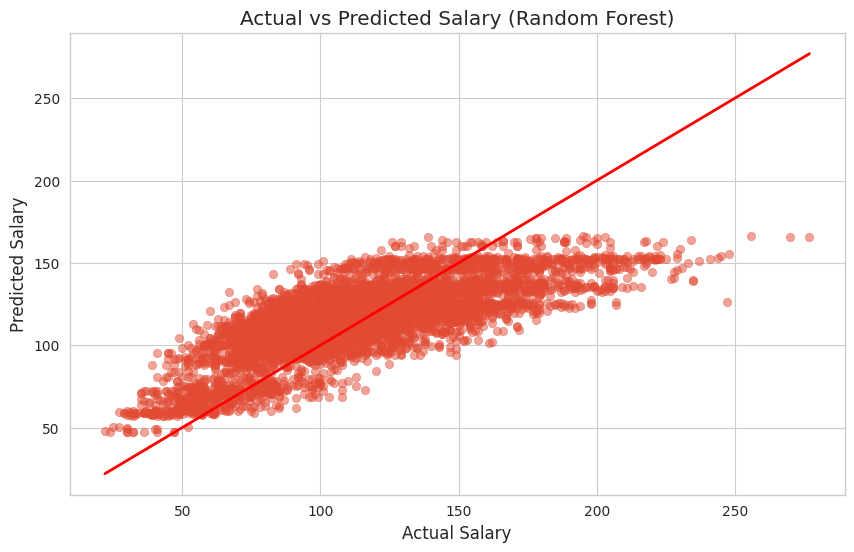

In [42]:
# Conversion en  pandas DataFrame avant la visualisation.
pd_predictions_rf = predictions2.toPandas()
# Tracez les résultats pour Random Forest
plot_predictions(pd_predictions_rf, 'Random Forest')


# ***Conclusion Générale et Recommandations***

Au cours de ce projet, vous avons exploré trois modèles différents pour prédire les salaires des employés en utilisant Apache Spark : **la régression linéaire, les Gradient Boosting Trees (GBT) et les Forêts Aléatoires (Random Forest).** Chacun de ces modèles a ses propres forces et peut être adapté à différents types de données et de complexité dans les relations entre les caractéristiques et la variable cible, le salaire.

**Les Gradient Boosting Trees** semblent être le meilleur modèle parmi ceux que vous avez testés, en termes d'équilibre entre précision et capacité à capturer la complexité des données. L'importance de ces modèles réside dans leur capacité à intégrer un large éventail de facteurs de travail — tels que le type d'emploi, le degré d'éducation, la spécialité, et l'industrie — pour fournir des estimations détaillées des salaires.

**Apache Spark, avec ses outils MLlib**, a joué un rôle crucial en permettant l'application efficace de ces modèles sur de grands ensembles de données de manière distribuée, rendant l'analyse rapide et gérable même pour des calculs complexes. Spark a facilité la gestion des différentes étapes du processus de machine learning, de la préparation des données à l'évaluation des modèles, le tout dans un environnement unifié.

Enfin, l'application de ces modèles de machine learning dans Spark a permis de mettre en lumière comment les salaires sont influencés par divers facteurs de travail, aidant ainsi les organisations à élaborer des stratégies de rémunération éclairées et à identifier les domaines d'investissement en capital humain les plus rentables. La capacité à prédire les salaires avec une telle précision est une compétence précieuse pour optimiser la gestion des ressources humaines et pour la planification stratégique au sein des entreprises.
